# Explorative Datenanalyse
Im Folgenden werden die gemessenen Index-Werte der Brokkoli analysiert. Im Vorfeld wurden diese bereits innerhalb der Voronoi-Zellen segmentiert, das heisst Es werden nur noch die Pixel gewertet, welche zum Brokkoli gehören, ohne die Erde darum zu berücksichtigen.

In [1]:
%reset

# Datenabfrage von Server-DB
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class font:
    BOLD = '\033[1m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'

# Liste der Daten, die berücksichtigt werden
dates = ['2019-04-18', '2019-04-25', '2019-05-01', '2019-05-09', '2019-05-16', '2019-05-24', '2019-06-04','2019-06-13', 
         '2019-06-18']

# Angeben, ob Blacklist einbezogen wird
useBlacklist = True

# Verbindungsaufbau
server = 'deepbroccoliserver.database.windows.net'
database = 'DeepBroccoliDatabase'
username = 'ntb'
password = 'brokkoli_2019'
driver= '{SQL Server}'
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

# Abfrage definieren und ausführen: Alle Brokkoli mit allen dazugehörigen Messwerten 
query = '''
select dbo.broccoli.id, dbo.broccoli.cropWeight, dbo.broccolivalues.timestamp, dbo.broccoli.lat, dbo.broccoli.long, dbo.broccolivalues.pixelCount, 
dbo.broccolivalues.maxNDVI, dbo.broccolivalues.minNDVI, dbo.broccolivalues.meanNDVI, dbo.broccolivalues.medianNDVI, 
dbo.broccolivalues.NDVI_15_QUANTILE, dbo.broccolivalues.NDVI_25_QUANTILE, dbo.broccolivalues.NDVI_75_QUANTILE, 
dbo.broccolivalues.NDVI_85_QUANTILE,
dbo.broccolivalues.maxNDRE, dbo.broccolivalues.minNDRE, dbo.broccolivalues.meanNDRE, dbo.broccolivalues.medianNDRE,
dbo.broccolivalues.NDRE_15_QUANTILE, dbo.broccolivalues.NDRE_25_QUANTILE, dbo.broccolivalues.NDRE_75_QUANTILE,
dbo.broccolivalues.NDRE_85_QUANTILE
from dbo.broccoli inner join dbo.broccolivalues on dbo.broccoli.id = dbo.broccolivalues.id'''

# Blacklist einbeziehen: Brokkoli-IDs in Blacklist werden gefiltert
if useBlacklist:
    query = query + ''' where dbo.broccoli.id not in (select broccoli_id from dbo.broccoliBlacklist)'''

SQL_Query = pd.read_sql_query(query, cnxn)
broccoli_data = pd.DataFrame(SQL_Query)
cnxn.close()

# Löschen von Datensätzen mit NaN-Werten (Ist der Fall falls pixelCount == 0)
print()
print("Anzahl Datensätze: " + str(len(broccoli_data)))

broccoli_data.dropna(inplace=True)
print("Anzahl Datensätze ohne NaN: " + str(len(broccoli_data)))
print()

# Describe: Erste Übersicht
for date in dates:    
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date]
    print(font.BOLD + font.UNDERLINE + date + font.END)
    display(broccoli_data_byDate.describe())
    print()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y

Anzahl Datensätze: 23958
Anzahl Datensätze ohne NaN: 22018

2019-04-18


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,...,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000
mean,1346.671188,553.822030,47.217911,9.493050,37.688039,0.599470,0.425259,0.508831,0.509349,0.451702,...,0.547264,0.563694,0.190813,-0.012902,0.088899,0.089085,0.038717,0.056388,0.121582,0.138837
std,773.455273,141.441309,0.000401,0.000293,8.971359,0.041358,0.029985,0.036243,0.038419,0.033696,...,0.040068,0.040670,0.043096,0.045775,0.026988,0.028746,0.033359,0.030879,0.029567,0.031331
min,4.000000,32.000000,47.217190,9.492415,12.000000,0.379433,0.263062,0.320237,0.311963,0.272311,...,0.343503,0.351531,0.065542,-0.229784,-0.030301,-0.038446,-0.117262,-0.068451,0.008623,0.033885
25%,672.000000,467.000000,47.217560,9.492841,32.000000,0.572357,0.406382,0.485545,0.483772,0.430148,...,0.520480,0.536969,0.160254,-0.040511,0.071801,0.072172,0.017381,0.037258,0.103050,0.118796
50%,1360.000000,555.000000,47.217918,9.493054,37.000000,0.600486,0.425353,0.509436,0.510421,0.451834,...,0.548008,0.563983,0.188023,-0.006408,0.092419,0.092587,0.045391,0.062803,0.122128,0.138209
75%,2018.000000,646.000000,47.218259,9.493268,44.000000,0.626899,0.445489,0.534056,0.535789,0.474990,...,0.574296,0.591907,0.215907,0.021823,0.107140,0.108838,0.063029,0.077731,0.140798,0.158732
max,2681.000000,1090.000000,47.218642,9.493662,78.000000,0.728941,0.539897,0.646206,0.663208,0.564750,...,0.699201,0.705629,0.422623,0.109630,0.161575,0.177574,0.116594,0.154753,0.282104,0.288997



2019-04-25


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,...,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,1346.311093,553.669668,47.217911,9.493049,46.544413,0.680746,0.482017,0.584206,0.587353,0.515810,...,0.631673,0.648931,0.293122,0.023220,0.168024,0.170505,0.102193,0.126598,0.212653,0.233948
std,772.388707,141.329148,0.000400,0.000293,11.748803,0.049383,0.035264,0.044467,0.047033,0.041250,...,0.048402,0.048722,0.063594,0.059171,0.036526,0.039159,0.040072,0.037981,0.045350,0.049772
min,4.000000,32.000000,47.217190,9.492415,2.000000,0.348900,0.290258,0.319579,0.319579,0.299054,...,0.334239,0.340104,0.098757,-0.232045,0.056765,0.055825,-0.117065,-0.079874,0.085852,0.089619
25%,672.500000,467.000000,47.217561,9.492839,39.000000,0.651012,0.459871,0.555439,0.556037,0.488503,...,0.600671,0.617441,0.249778,-0.011735,0.144366,0.145084,0.075863,0.101882,0.184076,0.202310
50%,1360.000000,555.000000,47.217918,9.493053,46.000000,0.681404,0.482563,0.584829,0.588145,0.515856,...,0.632721,0.650616,0.286008,0.028109,0.165865,0.169891,0.102341,0.126850,0.209220,0.229361
75%,2016.500000,646.000000,47.218258,9.493267,54.000000,0.716277,0.507286,0.617400,0.622307,0.544887,...,0.667775,0.684446,0.325837,0.063600,0.188893,0.193057,0.129774,0.151821,0.235873,0.258983
max,2681.000000,1090.000000,47.218642,9.493662,101.000000,0.810579,0.580237,0.689790,0.707065,0.619175,...,0.750291,0.769226,0.574725,0.178572,0.304583,0.331391,0.230546,0.259992,0.402568,0.426826



2019-05-01


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,...,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,1345.872958,553.468954,47.217910,9.493048,127.215278,0.800868,0.562703,0.684186,0.688353,0.607957,...,0.734834,0.755042,0.284489,-0.001526,0.140673,0.140964,0.086693,0.106461,0.174621,0.194144
std,772.757025,141.810483,0.000400,0.000293,27.456080,0.032620,0.022734,0.028251,0.030465,0.026808,...,0.031002,0.031315,0.068511,0.061068,0.032536,0.034162,0.040508,0.037808,0.034596,0.038034
min,4.000000,32.000000,47.217190,9.492415,17.000000,0.610481,0.431100,0.500278,0.485414,0.452909,...,0.535416,0.549550,0.130655,-0.305937,-0.035179,-0.044257,-0.146473,-0.111822,0.000673,0.039560
25%,671.750000,467.000000,47.217560,9.492839,110.000000,0.783235,0.549668,0.668473,0.670945,0.592846,...,0.716486,0.737485,0.234012,-0.033210,0.125829,0.125267,0.070150,0.091272,0.156174,0.171737
50%,1358.500000,555.000000,47.217917,9.493052,128.000000,0.804672,0.565421,0.687026,0.690553,0.610191,...,0.737466,0.757905,0.270213,0.008602,0.141981,0.143183,0.094379,0.112552,0.172056,0.188362
75%,2016.250000,646.000000,47.218258,9.493267,145.000000,0.822848,0.578387,0.702842,0.708218,0.625968,...,0.756375,0.776211,0.321454,0.042493,0.157058,0.157985,0.112644,0.128860,0.188794,0.210471
max,2681.000000,1090.000000,47.218642,9.493662,243.000000,0.885956,0.621285,0.764486,0.780028,0.690072,...,0.828266,0.847945,0.634640,0.142997,0.266080,0.265132,0.213776,0.247302,0.305857,0.419278



2019-05-09


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,...,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,1346.042466,553.457330,47.217911,9.493048,341.759902,0.864054,0.605820,0.768176,0.786051,0.689725,...,0.816304,0.828569,0.253556,-0.113982,0.093165,0.099113,0.030054,0.058693,0.132982,0.153097
std,772.644713,141.782683,0.000400,0.000293,68.028988,0.014800,0.010649,0.017206,0.018841,0.022053,...,0.015637,0.015044,0.059222,0.076644,0.023189,0.023216,0.035453,0.028445,0.025353,0.030165
min,4.000000,32.000000,47.217190,9.492415,20.000000,0.760770,0.535754,0.624455,0.614169,0.571794,...,0.668008,0.688555,0.114294,-0.451823,0.010929,0.009349,-0.151167,-0.077773,0.048686,0.065928
25%,672.000000,467.000000,47.217560,9.492839,303.000000,0.857401,0.600974,0.761200,0.778338,0.678637,...,0.809885,0.822173,0.212011,-0.161073,0.078538,0.085032,0.008020,0.040753,0.116918,0.133886
50%,1359.000000,555.000000,47.217917,9.493052,346.000000,0.865693,0.607866,0.770903,0.789355,0.691848,...,0.818893,0.830688,0.244256,-0.109052,0.093319,0.099499,0.031862,0.060807,0.130597,0.148141
75%,2016.000000,646.000000,47.218258,9.493267,385.000000,0.873427,0.612052,0.779183,0.797853,0.704101,...,0.826160,0.837726,0.283676,-0.059014,0.107319,0.113788,0.055736,0.078897,0.146608,0.167958
max,2681.000000,1090.000000,47.218642,9.493662,544.000000,0.902638,0.641869,0.819025,0.837019,0.756990,...,0.867475,0.881187,0.572957,0.046512,0.203677,0.203830,0.118478,0.158024,0.265532,0.344594



2019-05-16


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,...,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,1346.042466,553.457330,47.217911,9.493048,458.200490,0.886741,0.621390,0.772227,0.779701,0.700639,...,0.820046,0.838433,0.386472,-0.020723,0.201261,0.203502,0.137154,0.162404,0.243069,0.265697
std,772.644713,141.782683,0.000400,0.000293,98.136673,0.019703,0.013532,0.020264,0.021736,0.023127,...,0.021734,0.021194,0.091683,0.095217,0.032769,0.031630,0.038976,0.034408,0.036930,0.044625
min,4.000000,32.000000,47.217190,9.492415,9.000000,0.601460,0.469749,0.528651,0.539510,0.496593,...,0.540294,0.566369,0.204075,-0.478812,0.045758,0.052713,-0.060572,-0.027874,0.110969,0.140593
25%,672.000000,467.000000,47.217560,9.492839,400.000000,0.877684,0.614532,0.762191,0.768154,0.687751,...,0.808922,0.827888,0.316287,-0.073262,0.180646,0.184564,0.114591,0.142864,0.219232,0.236632
50%,1359.000000,555.000000,47.217917,9.493052,468.000000,0.888934,0.622864,0.774338,0.781870,0.702915,...,0.822032,0.840582,0.364215,-0.004465,0.199551,0.203429,0.141905,0.164829,0.237668,0.256840
75%,2016.000000,646.000000,47.218258,9.493267,526.000000,0.899199,0.629571,0.785623,0.794231,0.715732,...,0.834096,0.852004,0.437903,0.049317,0.221337,0.223429,0.164591,0.185775,0.263020,0.287755
max,2681.000000,1090.000000,47.218642,9.493662,728.000000,0.936661,0.656853,0.822826,0.838612,0.757908,...,0.879668,0.891404,0.774605,0.155240,0.335392,0.343649,0.229620,0.258156,0.438096,0.520104



2019-05-24


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,...,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,1346.042466,553.457330,47.217911,9.493048,1003.064108,0.914361,0.639880,0.796194,0.804094,0.725080,...,0.844629,0.862237,0.466538,-0.006389,0.261424,0.264935,0.195278,0.221265,0.305815,0.327825
std,772.644713,141.782683,0.000400,0.000293,197.140768,0.022793,0.016758,0.032229,0.037770,0.033406,...,0.033394,0.030811,0.163195,0.114672,0.134746,0.136801,0.128516,0.132161,0.140953,0.143927
min,4.000000,32.000000,47.217190,9.492415,81.000000,0.751347,0.534392,0.620162,0.607506,0.546851,...,0.674685,0.712843,0.144996,-0.465496,-0.088654,-0.105472,-0.172560,-0.149981,-0.041195,0.000913
25%,672.000000,467.000000,47.217560,9.492839,881.000000,0.901485,0.630381,0.776311,0.780653,0.704022,...,0.824141,0.843596,0.336361,-0.081874,0.163518,0.165952,0.102196,0.125777,0.202604,0.222167
50%,1359.000000,555.000000,47.217917,9.493052,995.000000,0.916730,0.640644,0.799713,0.806670,0.726722,...,0.848325,0.866104,0.417745,-0.007187,0.232219,0.234298,0.173020,0.195394,0.270200,0.289052
75%,2016.000000,646.000000,47.218258,9.493267,1116.000000,0.929319,0.650990,0.816664,0.828207,0.746918,...,0.865795,0.881589,0.585273,0.070483,0.326116,0.330867,0.255337,0.281696,0.374895,0.398322
max,2681.000000,1090.000000,47.218642,9.493662,1961.000000,0.978719,0.757975,0.913307,0.928941,0.866713,...,0.949230,0.957152,0.885469,0.425145,0.659116,0.665100,0.595982,0.624422,0.717508,0.744636



2019-06-04


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,...,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,1346.042466,553.457330,47.217911,9.493048,1152.610862,0.889124,0.627345,0.786239,0.792884,0.732344,...,0.823075,0.837691,0.346243,-0.179412,0.111080,0.116854,0.021057,0.057507,0.170186,0.198465
std,772.644713,141.782683,0.000400,0.000293,158.908548,0.021173,0.020738,0.025196,0.025389,0.031852,...,0.023131,0.022562,0.068211,0.079779,0.058727,0.060042,0.065222,0.063612,0.057951,0.057313
min,4.000000,32.000000,47.217190,9.492415,211.000000,0.798426,0.558633,0.696280,0.705077,0.615122,...,0.740926,0.755855,0.077391,-0.521817,-0.086979,-0.085649,-0.209394,-0.134909,-0.044954,-0.021634
25%,672.000000,467.000000,47.217560,9.492839,1074.000000,0.876868,0.615355,0.770447,0.776736,0.710743,...,0.809431,0.824723,0.302868,-0.226526,0.070456,0.075381,-0.023335,0.013796,0.129629,0.159370
50%,1359.000000,555.000000,47.217917,9.493052,1155.000000,0.892251,0.627801,0.789167,0.795897,0.733607,...,0.826915,0.841222,0.344173,-0.170964,0.116497,0.123341,0.023964,0.062157,0.177064,0.204216
75%,2016.000000,646.000000,47.218258,9.493267,1224.000000,0.904584,0.637107,0.804826,0.811772,0.755501,...,0.840222,0.854070,0.388405,-0.124569,0.154039,0.160741,0.066758,0.104073,0.213142,0.240622
max,2681.000000,1090.000000,47.218642,9.493662,1994.000000,0.944795,0.732271,0.843377,0.850750,0.813181,...,0.882042,0.899964,0.570194,0.047755,0.254154,0.265581,0.193233,0.215394,0.310905,0.346955



2019-06-13


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,...,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,1346.042466,553.457330,47.217911,9.493048,1459.373622,0.933315,0.709188,0.854769,0.859214,0.809043,...,0.887659,0.900042,0.490051,0.021960,0.283625,0.287148,0.198348,0.228932,0.341555,0.367754
std,772.644713,141.782683,0.000400,0.000293,184.423622,0.010783,0.034112,0.015534,0.015928,0.018996,...,0.015170,0.014433,0.054673,0.108634,0.045434,0.046810,0.052348,0.050062,0.044346,0.043755
min,4.000000,32.000000,47.217190,9.492415,436.000000,0.775258,0.545289,0.650548,0.649021,0.595542,...,0.686389,0.707284,0.321275,-0.453599,0.083418,0.123139,-0.078155,0.003100,0.172052,0.194765
25%,672.000000,467.000000,47.217560,9.492839,1368.000000,0.928368,0.683722,0.847210,0.851331,0.799644,...,0.879789,0.892427,0.452766,-0.030945,0.253588,0.255529,0.159854,0.192223,0.313440,0.340540
50%,1359.000000,555.000000,47.217917,9.493052,1437.000000,0.934468,0.712448,0.856290,0.860391,0.811191,...,0.888752,0.901042,0.487326,0.038984,0.280989,0.285588,0.195087,0.226684,0.340214,0.366971
75%,2016.000000,646.000000,47.218258,9.493267,1516.000000,0.939864,0.733910,0.864610,0.869059,0.821057,...,0.897231,0.909070,0.526259,0.094488,0.313929,0.318775,0.235141,0.264903,0.371747,0.397357
max,2681.000000,1090.000000,47.218642,9.493662,3058.000000,0.956885,0.806188,0.896153,0.904995,0.860916,...,0.926101,0.933852,0.725093,0.235499,0.401273,0.412519,0.338219,0.355898,0.458193,0.492195



2019-06-18


,id,cropWeight,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,...,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,1346.042466,553.457330,47.217911,9.493048,1249.301756,0.906089,0.763988,0.853086,0.856086,0.826223,...,0.871872,0.879126,0.372097,0.127459,0.271245,0.272187,0.236598,0.249242,0.295046,0.307169
std,772.644713,141.782683,0.000400,0.000293,160.878118,0.010864,0.031684,0.010464,0.009716,0.013804,...,0.009507,0.009681,0.023179,0.067941,0.013158,0.012672,0.016024,0.013961,0.013085,0.013774
min,4.000000,32.000000,47.217190,9.492415,429.000000,0.823216,0.591504,0.744240,0.760523,0.672485,...,0.782329,0.789350,0.292437,-0.311951,0.148610,0.149633,0.088541,0.109314,0.188817,0.205627
25%,672.000000,467.000000,47.217560,9.492839,1170.000000,0.899221,0.753640,0.848503,0.851352,0.820998,...,0.866711,0.873634,0.355832,0.095554,0.263775,0.264611,0.229083,0.241860,0.286635,0.298139
50%,1359.000000,555.000000,47.217917,9.493052,1232.000000,0.905692,0.769253,0.854056,0.856748,0.827711,...,0.872135,0.879236,0.369345,0.144684,0.272097,0.272969,0.237973,0.250092,0.295370,0.306943
75%,2016.000000,646.000000,47.218258,9.493267,1300.000000,0.913454,0.782958,0.859191,0.861996,0.833736,...,0.877558,0.885112,0.386651,0.175871,0.280352,0.280874,0.246673,0.258127,0.304180,0.316595
max,2681.000000,1090.000000,47.218642,9.493662,2486.000000,0.935801,0.842558,0.889731,0.892876,0.869495,...,0.906542,0.914740,0.487948,0.233851,0.309804,0.309437,0.281635,0.290637,0.339671,0.356725


## Analyse der Pixel-Menge (pixelCount)
Als erstes werden die Anzahl Pixel, die nach der Segmentierung eine Brokkoli-Pflanze darstellen, analysiert. Hier wird versucht, inkorrekt oders seltsam segmentierte Daten zu finden.

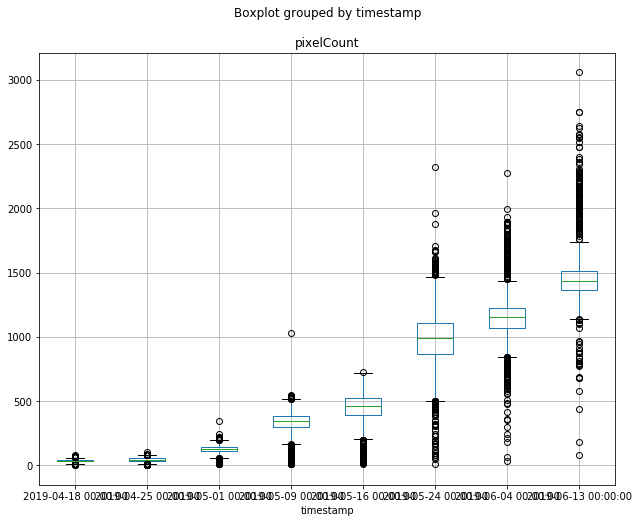

In [2]:
# Boxplot der Pixelanzahl gruppiert nach Datum
broccoli_data.boxplot(by="timestamp", column=['pixelCount'], figsize=(10,8))

In [2]:
# Analyse pixelCount: Datensätze in Bereich ausserhalb bestimmter Quantile analysieren
# Erstellung von CSV und HTML Export zur manuellen Analyse und Erstellung eine Blacklist mit inkorrekt segmentierten Datensätzen

pixelCountNotable = pd.DataFrame()
for date in dates:    
    # Listen mit Pflanzen mit pixelCount > [quantile_Lower]-Quantil bzw. < [quantile_Upper]-Quantil erstellen
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date]
    
    quantile_Lower = 0.03
    quantile_Upper = 0.97
    
    underLowerQuant = broccoli_data_byDate[broccoli_data_byDate.pixelCount < 
                                        broccoli_data_byDate['pixelCount'].quantile(quantile_Lower)][['id', 'pixelCount']]
    overUpperQuant = broccoli_data_byDate[broccoli_data_byDate.pixelCount > 
                                       broccoli_data_byDate['pixelCount'].quantile(quantile_Upper)][['id', 'pixelCount']]
    
    # Liste aller gefilterter IDs nach Datum erstellen
    underLowerQuant[date + "_Under"] = 1
    overUpperQuant[date + "_Over"] = 1
    underLowerQuant.set_index('id', inplace=True)
    overUpperQuant.set_index('id', inplace=True)
    pixelCountNotable = pd.concat([pixelCountNotable, underLowerQuant[date + "_Under"]], axis=1)
    pixelCountNotable = pd.concat([pixelCountNotable, overUpperQuant[date + "_Over"]], axis=1)    
    underLowerQuant.drop([date + "_Under"], axis=1, inplace=True)
    overUpperQuant.drop([date + "_Over"], axis=1, inplace=True)
    underLowerQuant.reset_index(inplace=True)
    overUpperQuant.reset_index(inplace=True)
    
    # CSV mit IDs der Pflanzen mit pixelCount < [quantile_Lower]-Quantil oder > [quantile_Upper]-Quantil erstellen
    underLowerQuant['toBlacklist']= 0
    overUpperQuant['toBlacklist']= 0
    np.savetxt("pixelCount_notableIDs_" + date + ".csv", pd.concat([underLowerQuant, overUpperQuant]), 
               header="id;pixelCount;toBlacklist", delimiter=";", fmt="%d", comments='')    
    
    # HTML mit den Segmentierungs-Bildern erstellen
    strHtml = ""
    for index, row in pd.concat([underLowerQuant, overUpperQuant]).iterrows():
        strId = str(row["id"])
        strHtml += "<p>#" + strId + " ; pixelCount = " + str(row["pixelCount"]) + "</p>\n"
        strHtml += "<img src=\"\\\\fs004\\ice\\Lehre\\Bachelorarbeiten\\2019\\Pflanzen\\Drohnenaufnahmen\\" \
        + (str(date)).replace('-', '') + "\\report\\images\\" + strId + "\\ndvi_ndre_cutout_comparision_" + strId + ".png\">\n"
       
    
    html = open("pixelCount_NotableImages_" + date + ".html", 'w')
    html.write(strHtml)
    html.close()
    
    # Ausgabe der Anzahlen
    nofUnderLowerQuant = len(underLowerQuant)
    nofOverUpperQuant = len(overUpperQuant)
    
    print(date + ":: <" + str(quantile_Lower*100) + "%; " + str(nofUnderLowerQuant) + " | >" + str(quantile_Upper*100) + "%; "
          + str(nofOverUpperQuant))
    
# Ausgabe Liste aller gefilterter IDs nach Datum
pixelCountNotable.fillna(value=0, inplace=True)
pixelCountNotable.to_csv("pixelCount_Notable_PerDate.csv", sep=';')

2019-04-18:: <3.0%; 56 | >97.0%; 66
2019-04-25:: <3.0%; 73 | >97.0%; 73
2019-05-01:: <3.0%; 71 | >97.0%; 65
2019-05-09:: <3.0%; 73 | >97.0%; 71
2019-05-16:: <3.0%; 73 | >97.0%; 70
2019-05-24:: <3.0%; 74 | >97.0%; 74
2019-06-04:: <3.0%; 74 | >97.0%; 74
2019-06-13:: <3.0%; 73 | >97.0%; 74
2019-06-18:: <3.0%; 74 | >97.0%; 73


### Zwischenfazit pixelCount, Stand 21.05.2019
Da im Boxplot ersichtlich ist, dass es einige Ausreisser gibt, werden die Datensätze mit pixelCount ausserhalb der 2%- bzw. 98%-Quantile genauer untersucht (Muss allenfalls auf z.B. 5%, 95% ausgeweitet werden). Dazu werden je Datum eine CSV- und eine HTML-Datei erstellt, mit den IDs, dem pixelCount und den Vergleichsbildern der Segmentierung (im HTML). Diese müssen manuell kontrolliert werden, danach können Datensätze entweder gelöscht oder angepasst werden.
Im Vergleich zu den alten Daten (nicht mehr ersichtlich da überschrieben), gibt es aber vorallem nach oben, über der 75%-Quantils-Grenze, weniger krasse Ausreisser.

## Analyse der NDVI und NDRE Messwerte
Im Folgenden werden die aggregierten NDVI und NDRE Werte der segmentierten Bilder analysiert. Es werden Ausreisser und auffällige Messwerte gesucht, zeitliche Verläufe der Werte, und Abhängigkeiten zwischen den Indizes. Ein Plot mit y-Achse = NDRE und x-Achse = NDVI würde die Grundlage für die Berechnung des CCCI bilden.

## NDVI

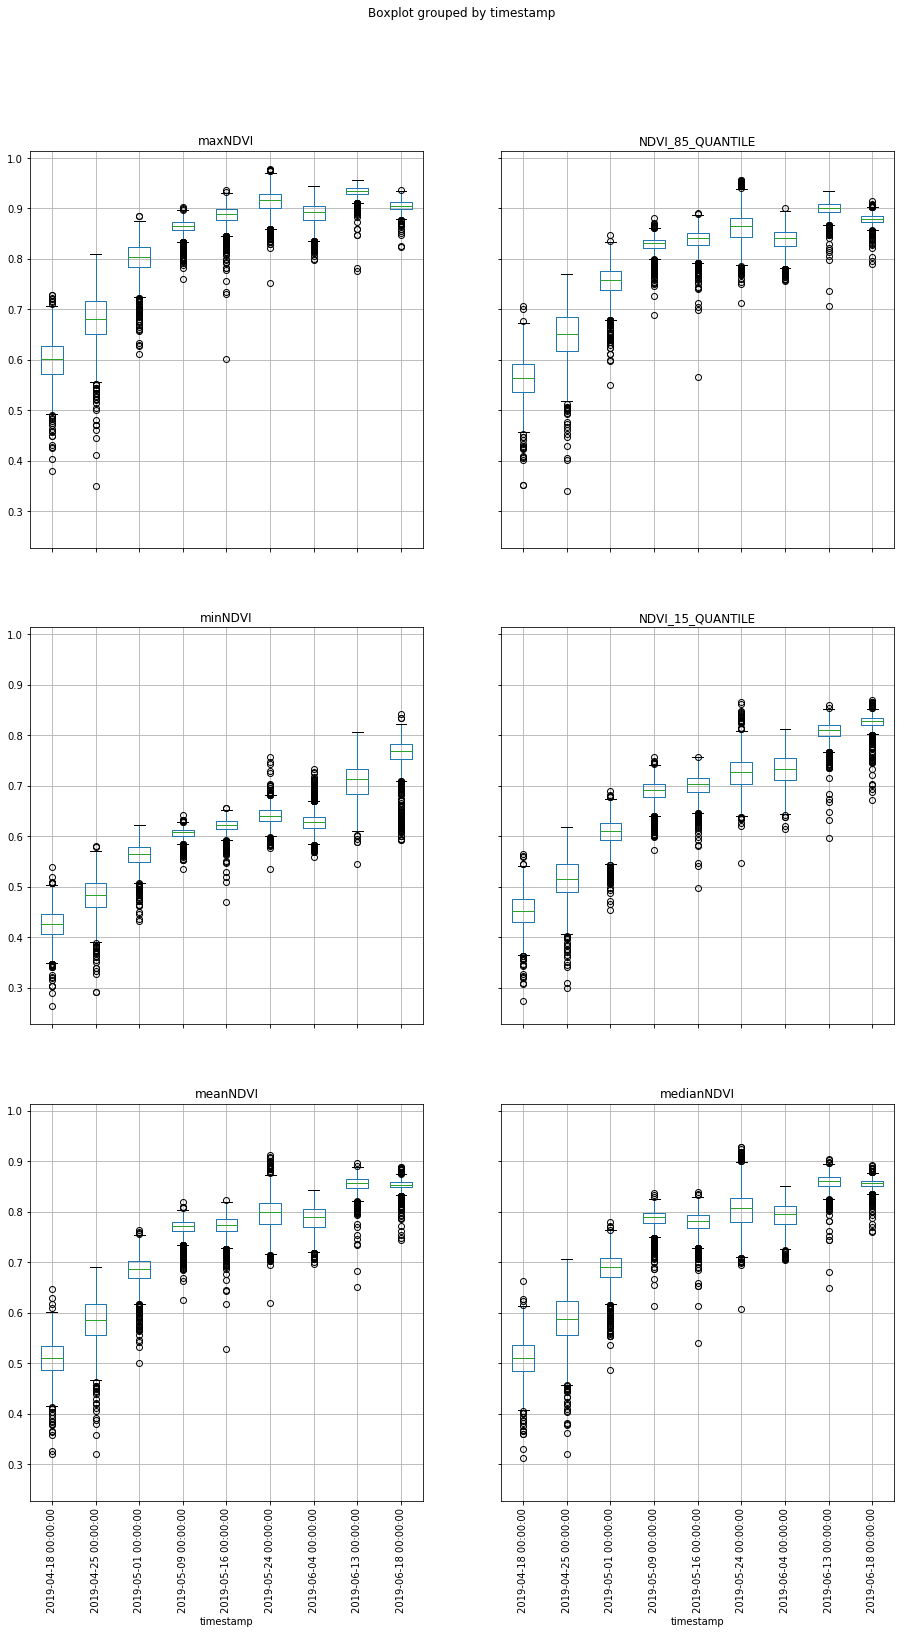

In [3]:
# Boxplot der NDVI-Werte gruppiert nach Datum
columns = ['maxNDVI', 'NDVI_85_QUANTILE', 'minNDVI', 'NDVI_15_QUANTILE', 'meanNDVI', 'medianNDVI']
ax = broccoli_data.boxplot(by="timestamp", column=columns, layout=(3,2), figsize=(15,25), rot=90)

### Zwischenfazit NDVI, Stand 21.05.2019
Es ist ersichtlich, dass die NDVI-Werte mit der Zeit im Mittel tendenziell steigen.
Statt der Max-/Min-Werte sollten eher die 15%-/85%-Quantile verwenedet werden, um Ausreisser zu vermeiden. Es ist jedoch ersichtlich, dass diese ähnlich oder fast stärker streuen als die Max-/Min-Werte. 

## NDRE

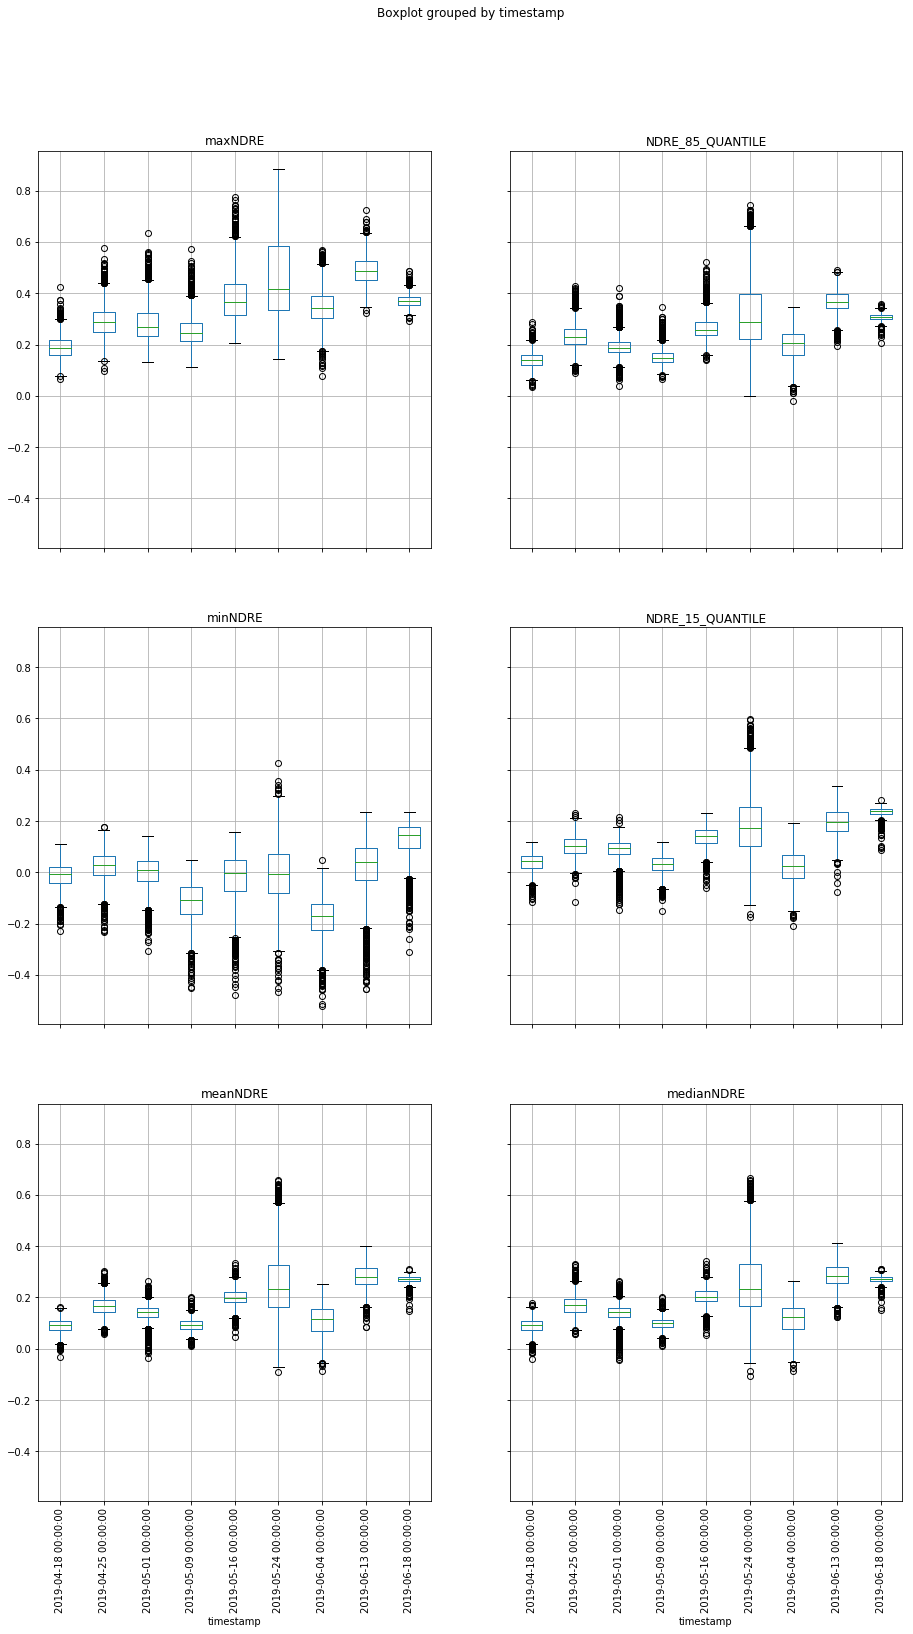

In [4]:
# Boxplot der NDRE-Werte gruppiert nach Datum
columns = ['maxNDRE', 'NDRE_85_QUANTILE', 'minNDRE', 'NDRE_15_QUANTILE', 'meanNDRE', 'medianNDRE']
ax = broccoli_data.boxplot(by="timestamp", column=columns, layout=(3,2), figsize=(15,25), rot=90)

### Zwischenfazit NDRE, Stand 21.05.2019
Bei dem NDRE-Messwerten ist ersichtlich, dass die Streuung um den Mittelwert bei den 15%-/85%-Quantilen kleiner ist als bei den Min-/Max-Werten. zudem steigen die NDRE Messwerte nicht kontinuierlich, sondern fallen und steigen wieder. Dass die unteren und oberen Werten ähnlich fallen und steigen, lässt auf eine gewisse Konsistenz in der Datenerfassung schliessen.

## Plot NDVI/NDRE
Für die allfällige Berechnung des CCCI ist ein Scatterplot mit x-Achse = NDVI und y-Achse = NDRE die Voraussetzung. Im Folgenden wird dieser mit den 85%-Quantilen und mit den Mittelwerten der Datensätze erstellt.

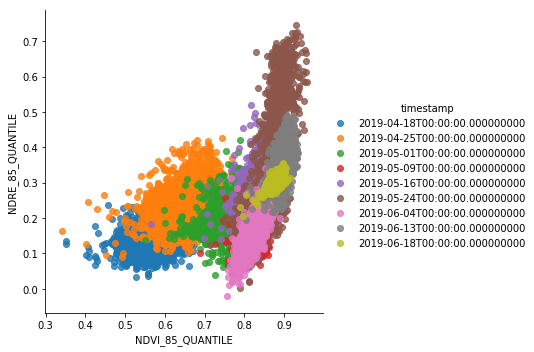

In [5]:
import seaborn as sns 
sns.lmplot(x='NDVI_85_QUANTILE', y='NDRE_85_QUANTILE', data=broccoli_data, hue='timestamp', fit_reg=False)
plt.show()

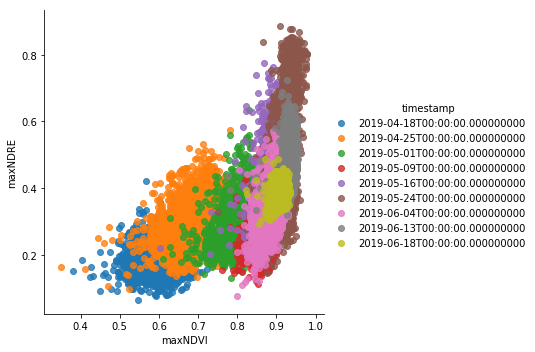

In [6]:
sns.lmplot(x='maxNDVI', y='maxNDRE', data=broccoli_data, hue='timestamp', fit_reg=False)
plt.show()

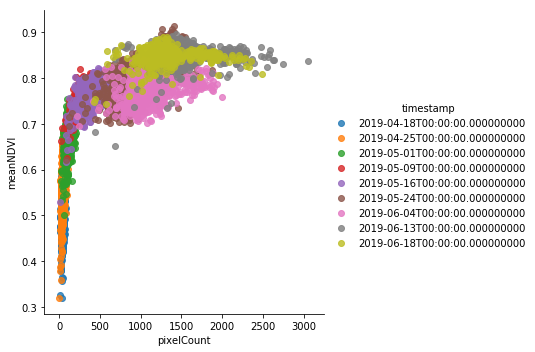

In [7]:
sns.lmplot(x='pixelCount', y='meanNDVI', data=broccoli_data, hue='timestamp', fit_reg=False)
plt.show()

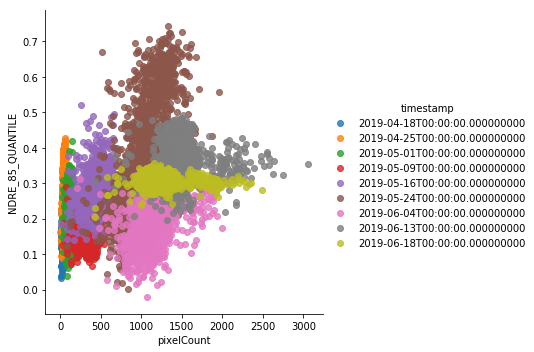

In [8]:
sns.lmplot(x='pixelCount', y='NDRE_85_QUANTILE', data=broccoli_data, hue='timestamp', fit_reg=False)
plt.show()

### Zwischenfazit NDVI/NDRE, Stand 21.05.2019
Wie in den Scatterplots ersichtlich ist, sind die Datenwolken nach Datum einigermassen örtlich gruppiert. Dabei treten jedoch sehr verschiedene NDRE-Werte pro Datum und auch NDVI-Wert auf. Eine lineare Beziehung NDVI->NDRE, wie sie in der Literatur (vergleiche Fachmodul) gezeigt wurde, ist nicht wirklich sichtbar. Die Berechnung des CCCI anhand dieser Daten ist momentan noch nicht vielversprechend, könnte jedoch gewagt werden. Abzuwarten ist, ob die NDRE-Werte mit der Zeit noch ansteigen, da sie mittlerweile eher tiefe Werte annehmen.

## Analyse der Erntedaten (Gewicht)

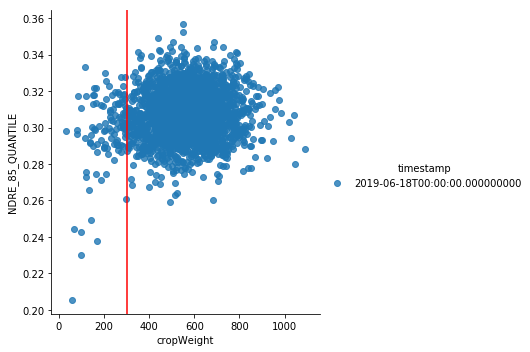

In [23]:
broccoli_data_lastDate = broccoli_data[broccoli_data.timestamp == '2019-06-18']
sns.lmplot(x='cropWeight', y='NDRE_85_QUANTILE', data=broccoli_data_lastDate, hue='timestamp', fit_reg=False)
plt.axvline(x=300, color='red')
plt.show()

In [20]:
broccoli_data_lastDate_unripe = broccoli_data_lastDate[broccoli_data_lastDate.cropWeight < 300]
broccoli_data_lastDate_ripe = broccoli_data_lastDate[broccoli_data_lastDate.cropWeight >= 300]
print("Anzahl unreife Brokkoli (Gewicht < 300g): " + str(len(broccoli_data_lastDate_unripe)))
print("Durchschnitt meanNDVI unreife: " + str(broccoli_data_lastDate_unripe['meanNDVI'].mean()))
print("Durchschnitt meanNDRE unreife: " + str(broccoli_data_lastDate_unripe['meanNDRE'].mean()))
print("Durchschnitt medianNDRE unreife: " + str(broccoli_data_lastDate_unripe['medianNDRE'].mean()))
print("Durchschnitt NDRE_85_QUANTILE unreife: " + str(broccoli_data_lastDate_unripe['NDRE_85_QUANTILE'].mean()))
print("Durchschnitt NDRE_15_QUANTILE unreife: " + str(broccoli_data_lastDate_unripe['NDRE_15_QUANTILE'].mean()))
print()
print("Anzahl reife Brokkoli (Gewicht >= 300g): " + str(len(broccoli_data_lastDate_ripe)))
print("Durchschnitt meanNDVI reife: " + str(broccoli_data_lastDate_ripe['meanNDVI'].mean()))
print("Durchschnitt meanNDRE reife: " + str(broccoli_data_lastDate_ripe['meanNDRE'].mean()))
print("Durchschnitt medianNDRE reife: " + str(broccoli_data_lastDate_ripe['medianNDRE'].mean()))
print("Durchschnitt NDRE_85_QUANTILE reife: " + str(broccoli_data_lastDate_ripe['NDRE_85_QUANTILE'].mean()))
print("Durchschnitt NDRE_15_QUANTILE reife: " + str(broccoli_data_lastDate_ripe['NDRE_15_QUANTILE'].mean()))

Anzahl unreife Brokkoli (Gewicht < 300g): 109
Durchschnitt meanNDVI unreife: 0.7826997404549044
Durchschnitt meanNDRE unreife: 0.24999394772624695
Durchschnitt medianNDRE unreife: 0.2538388143165396
Durchschnitt NDRE_85_QUANTILE unreife: 0.3196279341269524
Durchschnitt NDRE_15_QUANTILE unreife: 0.1797259131349023

Anzahl reife Brokkoli (Gewicht >= 300g): 2340
Durchschnitt meanNDVI reife: 0.7968227394170361
Durchschnitt meanNDRE reife: 0.2619564669433155
Durchschnitt medianNDRE reife: 0.2654519298289003
Durchschnitt NDRE_85_QUANTILE reife: 0.3282072834884706
Durchschnitt NDRE_15_QUANTILE reife: 0.1960019489084125


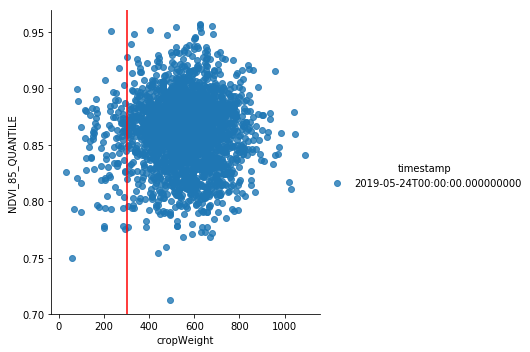

In [21]:
sns.lmplot(x='cropWeight', y='NDVI_85_QUANTILE', data=broccoli_data_lastDate, hue='timestamp', fit_reg=False)
plt.axvline(x=300, color='red')
plt.show()

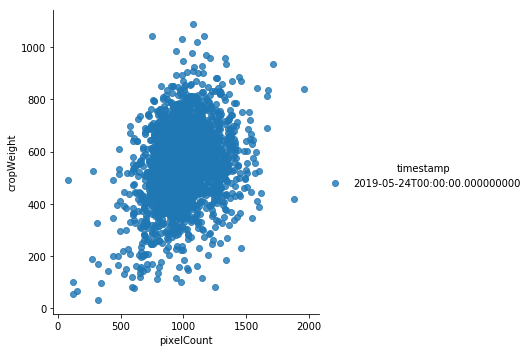

In [22]:
sns.lmplot(x='pixelCount', y='cropWeight', data=broccoli_data_lastDate, hue='timestamp', fit_reg=False)
plt.show()

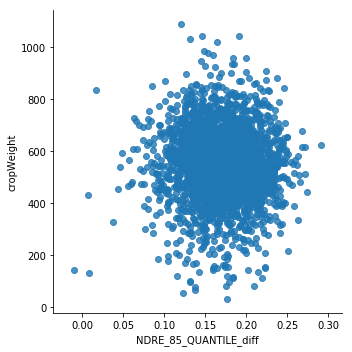

In [113]:
broccoli_cropData = broccoli_data_lastDate[['id', 'cropWeight']].copy()
broccoli_cropData = broccoli_cropData.merge(broccoli_data[broccoli_data.timestamp == '2019-06-18'][['id', 'NDRE_85_QUANTILE']], 
                                            left_on='id', right_on='id')
broccoli_cropData = broccoli_cropData.merge(broccoli_data[broccoli_data.timestamp == '2019-04-18'][['id', 'NDRE_85_QUANTILE']], 
                                            left_on='id', right_on='id', suffixes=('_0618', '_0418'))
broccoli_cropData['NDRE_85_QUANTILE_diff'] = (broccoli_cropData['NDRE_85_QUANTILE_0618'] - 
                                              broccoli_cropData['NDRE_85_QUANTILE_0418'])

sns.lmplot(x='NDRE_85_QUANTILE_diff', y='cropWeight', data=broccoli_cropData, fit_reg=False)
plt.show()

In [114]:
broccoli_cropData = broccoli_cropData.merge(broccoli_data.groupby(['id']).sum().drop(['lat', 'long', 'cropWeight'], axis=1).
                                            add_suffix('_sum'), left_on='id', right_on='id')
broccoli_cropData.head()

,id,cropWeight,NDRE_85_QUANTILE_0618,NDRE_85_QUANTILE_0418,NDRE_85_QUANTILE_diff,pixelCount_sum,maxNDVI_sum,minNDVI_sum,meanNDVI_sum,medianNDVI_sum,...,NDVI_75_QUANTILE_sum,NDVI_85_QUANTILE_sum,maxNDRE_sum,minNDRE_sum,meanNDRE_sum,medianNDRE_sum,NDRE_15_QUANTILE_sum,NDRE_25_QUANTILE_sum,NDRE_75_QUANTILE_sum,NDRE_85_QUANTILE_sum
0,4,504.0,0.275040,0.158087,0.116952,5121,7.451928,5.321377,6.599004,6.670540,...,6.979826,7.110945,2.551223,0.005736,1.421292,1.403219,0.975019,1.103663,1.738070,1.903032
1,5,171.0,0.237895,0.112905,0.124990,3891,7.265805,5.095580,6.346546,6.399594,...,6.792361,6.959349,2.484260,-0.296113,1.278361,1.295557,0.787031,0.993728,1.610418,1.759785
2,6,515.0,0.263207,0.131910,0.131297,6623,7.490016,5.284914,6.556198,6.604402,...,6.965199,7.140889,2.596531,-0.304621,1.428765,1.453808,0.998661,1.149387,1.736292,1.892100
3,7,306.0,0.289439,0.139753,0.149687,4687,7.476358,5.250390,6.618661,6.715152,...,7.001955,7.138823,2.789708,-0.237726,1.472872,1.486261,0.978263,1.150880,1.772767,1.967586
4,8,539.0,0.276548,0.136367,0.140181,5259,7.361027,5.172942,6.499014,6.579217,...,6.881017,7.023157,2.618838,0.071814,1.405235,1.405704,0.966624,1.122759,1.698669,1.860537


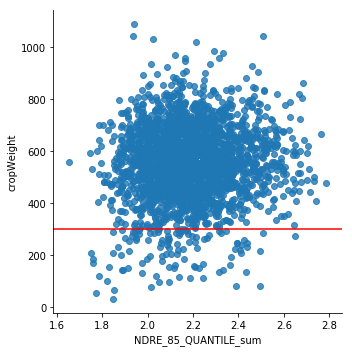

In [115]:
sns.lmplot(x='NDRE_85_QUANTILE_sum', y='cropWeight', data=broccoli_cropData, fit_reg=False)
plt.axhline(y=300, color='red')
plt.show()

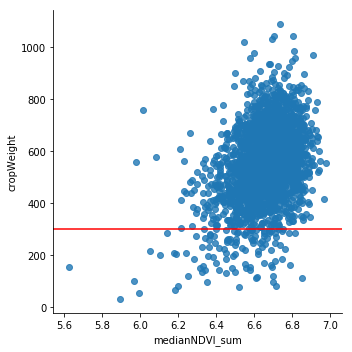

In [116]:
sns.lmplot(x='medianNDVI_sum', y='cropWeight', data=broccoli_cropData, fit_reg=False)
plt.axhline(y=300, color='red')
plt.show()

In [118]:
from scipy import integrate

broccoli_cropData['medianNDVI_Integral'] = 0.0
broccoli_cropData['medianNDRE_Integral'] = 0.0
x = [0, 7, 13, 21, 28, 36, 47, 56, 62]

for index, row in broccoli_cropData.iterrows():
    if(len(broccoli_data[broccoli_data.id==row['id']]['medianNDVI'].to_numpy()) == 9):
        broccoli_cropData.at[index, 'medianNDVI_Integral'] = integrate.cumtrapz(broccoli_data[broccoli_data.id==row['id']]
                                                                            ['medianNDVI'].to_numpy(), x=x, initial=0)[8]
        broccoli_cropData.at[index, 'medianNDRE_Integral'] = integrate.cumtrapz(broccoli_data[broccoli_data.id==row['id']]
                                                                            ['medianNDRE'].to_numpy(), x=x, initial=0)[8]

broccoli_cropData.head()

,id,cropWeight,NDRE_85_QUANTILE_0618,NDRE_85_QUANTILE_0418,NDRE_85_QUANTILE_diff,pixelCount_sum,maxNDVI_sum,minNDVI_sum,meanNDVI_sum,medianNDVI_sum,...,maxNDRE_sum,minNDRE_sum,meanNDRE_sum,medianNDRE_sum,NDRE_15_QUANTILE_sum,NDRE_25_QUANTILE_sum,NDRE_75_QUANTILE_sum,NDRE_85_QUANTILE_sum,medianNDVI_Integral,medianNDRE_Integral
0,4,504.0,0.275040,0.158087,0.116952,5121,7.451928,5.321377,6.599004,6.670540,...,2.551223,0.005736,1.421292,1.403219,0.975019,1.103663,1.738070,1.903032,46.415482,9.653869
1,5,171.0,0.237895,0.112905,0.124990,3891,7.265805,5.095580,6.346546,6.399594,...,2.484260,-0.296113,1.278361,1.295557,0.787031,0.993728,1.610418,1.759785,45.025790,8.924524
2,6,515.0,0.263207,0.131910,0.131297,6623,7.490016,5.284914,6.556198,6.604402,...,2.596531,-0.304621,1.428765,1.453808,0.998661,1.149387,1.736292,1.892100,46.101142,9.933913
3,7,306.0,0.289439,0.139753,0.149687,4687,7.476358,5.250390,6.618661,6.715152,...,2.789708,-0.237726,1.472872,1.486261,0.978263,1.150880,1.772767,1.967586,46.740043,10.116395
4,8,539.0,0.276548,0.136367,0.140181,5259,7.361027,5.172942,6.499014,6.579217,...,2.618838,0.071814,1.405235,1.405704,0.966624,1.122759,1.698669,1.860537,45.911821,9.639602


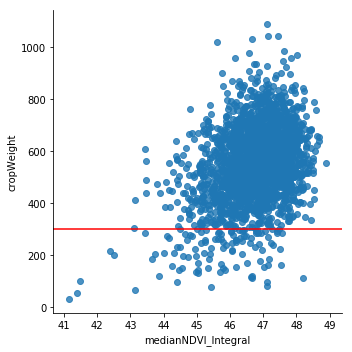

In [122]:
test_Broccoli = broccoli_cropData.copy()
test_Broccoli = test_Broccoli[test_Broccoli['medianNDVI_Integral']>= 40]
sns.lmplot(x='medianNDVI_Integral', y='cropWeight', data=test_Broccoli, fit_reg=False)
plt.axhline(y=300, color='red')
plt.show()

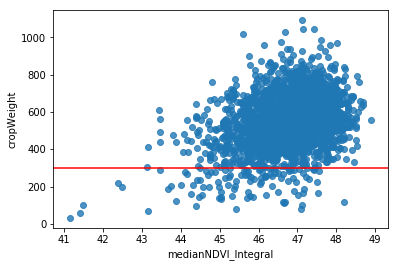

In [125]:
sns.regplot(x='medianNDVI_Integral', y='cropWeight', data=test_Broccoli, fit_reg=False)
plt.axhline(y=300, color='red')
plt.show()

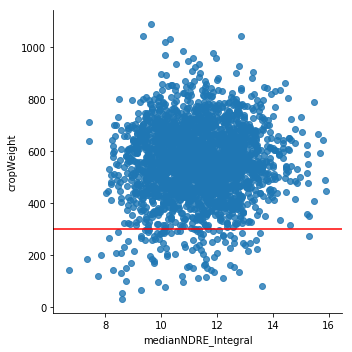

In [124]:
test_Broccoli = test_Broccoli[test_Broccoli['medianNDRE_Integral']>= 6]
sns.lmplot(x='medianNDRE_Integral', y='cropWeight', data=test_Broccoli, fit_reg=False)
plt.axhline(y=300, color='red')
plt.show()

## Meteomatics Daten

In [10]:
# Abfrage definieren und ausführen: Alle Meteomatics-Daten
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
SQL_Query = pd.read_sql_query('SELECT * FROM dbo.meteomatics', cnxn)
meteomatics_data = pd.DataFrame(SQL_Query)
cnxn.close()

meteomatics_data.head()

,timestamp,temperature,relativeHumidity,absoluteHumidity,dewPoint,wind,cloudCover,precipitation,precipitationType,precipitationProbability,hail,evaporation,frostDepth,radiation,accumulatedEnergy,evapotranspiration,growingDegreeDays,leafWetness
0,2019-04-08 09:00:00.243,7.4,93.800003,7.5,6.5,1.5,100.000000,0.10,0.0,5.7,0.0,-0.04,0.0,337.299988,59040.500000,0.04,NaN,1.0
1,2019-04-08 07:56:07.257,7.0,93.900002,7.3,6.1,0.4,99.000000,0.04,0.0,1.0,0.0,-0.01,0.0,126.000000,40193.898438,0.00,NaN,1.0
2,2019-04-08 07:56:37.323,7.0,93.900002,7.3,6.1,0.4,99.000000,0.04,0.0,1.0,0.0,-0.01,0.0,126.000000,40193.898438,0.00,NaN,1.0
3,2019-04-08 10:00:00.207,7.8,94.199997,7.7,7.0,0.8,100.000000,0.03,0.0,1.0,0.0,-0.09,0.0,529.599976,19428.500000,0.06,NaN,1.0
4,2019-04-08 14:00:00.203,11.2,68.800003,7.0,5.7,1.6,97.599998,0.00,0.0,1.0,0.0,-0.17,0.0,848.700012,856912.625000,0.25,0.0,0.0


In [11]:
# Aggregieren der Meteomatics-Daten zwischen den Messzeitpunkten
# Datum eine Woche vor erstem Messdatum hinzufügen -> Wetterdaten-Aggregation bis zu diesem Zeitpunkt
i = 0
meteomatics_aggregates = pd.DataFrame()
dates_Meteomatics =['2019-04-11'] + dates
while i < (len(dates_Meteomatics) - 1):
    weekly_data = meteomatics_data[((meteomatics_data.timestamp > dates_Meteomatics[i]) & (meteomatics_data.timestamp < dates_Meteomatics[i+1]))][['temperature', 'precipitation', 'radiation', 'relativeHumidity', 'wind', 'cloudCover']]
    weekly_data_agg = pd.DataFrame(weekly_data.agg(['mean']))
    weekly_data_agg['dateFrom'] = dates_Meteomatics[i]
    weekly_data_agg['dateTo'] = dates_Meteomatics[i+1]
    weekly_data_agg['index'] = i
    weekly_data_agg.set_index(['index'], inplace=True)
    meteomatics_aggregates = pd.concat([meteomatics_aggregates, weekly_data_agg], axis=0)
    
    i = i + 1
    
display(meteomatics_aggregates)

,temperature,precipitation,radiation,relativeHumidity,wind,cloudCover,dateFrom,dateTo
index,,,,,,,,
0,8.167262,0.019762,288.023810,78.371428,2.136905,73.358929,2019-04-11,2019-04-18
1,15.263095,0.006429,305.483928,46.720833,5.640476,23.620238,2019-04-18,2019-04-25
2,9.009722,0.193681,320.585417,75.047222,3.323611,84.314583,2019-04-25,2019-05-01
3,8.699476,0.117068,336.826703,72.542408,2.657068,68.918325,2019-05-01,2019-05-09
4,9.201190,0.157500,348.977976,72.144048,4.416667,61.736310,2019-05-09,2019-05-16
5,11.502604,0.323594,360.567709,81.632813,2.378125,75.412500,2019-05-16,2019-05-24
6,15.044867,0.064183,370.204183,75.316350,1.838783,54.486692,2019-05-24,2019-06-04
7,16.870233,0.341620,379.955093,72.488372,2.853488,58.016279,2019-06-04,2019-06-13


In [39]:
broccoli_data_aggregates = pd.DataFrame()
for date in dates:    
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date][['meanNDVI', 'NDRE_85_QUANTILE', 'pixelCount']]
    broccoli_data_byDate_agg = pd.DataFrame(broccoli_data_byDate.agg(['mean']))
    broccoli_data_byDate_agg = broccoli_data_byDate_agg.add_prefix('meanAgg_')
    broccoli_data_byDate_agg['date'] = date
    #weekly_data_agg.set_index(['index'], inplace=True)
    broccoli_data_aggregates = pd.concat([broccoli_data_aggregates, broccoli_data_byDate_agg], axis=0)
    
display(broccoli_data_aggregates)

,meanAgg_meanNDVI,meanAgg_NDRE_85_QUANTILE,meanAgg_pixelCount,date
mean,0.508038,0.138695,37.367525,2019-04-18
mean,0.581948,0.234038,45.921946,2019-04-25
mean,0.681919,0.193867,125.211220,2019-05-01
mean,0.765795,0.152565,335.578195,2019-05-09
mean,0.770183,0.264440,450.262066,2019-05-16
mean,0.794788,0.324647,987.689098,2019-05-24
mean,0.785580,0.198212,1146.194591,2019-06-04
mean,0.854139,0.367054,1456.525920,2019-06-13


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029079183780>,
      dtype=object)

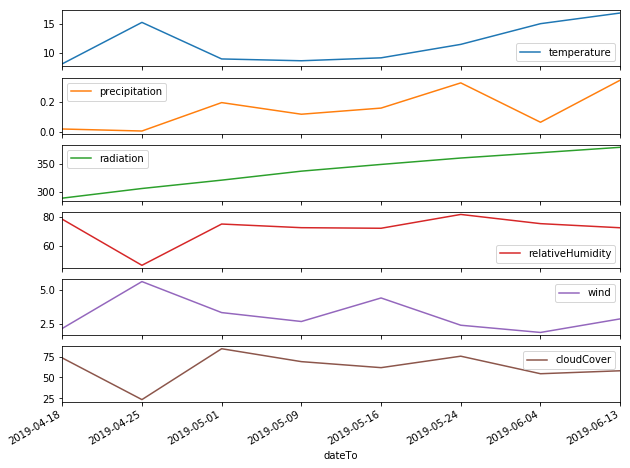

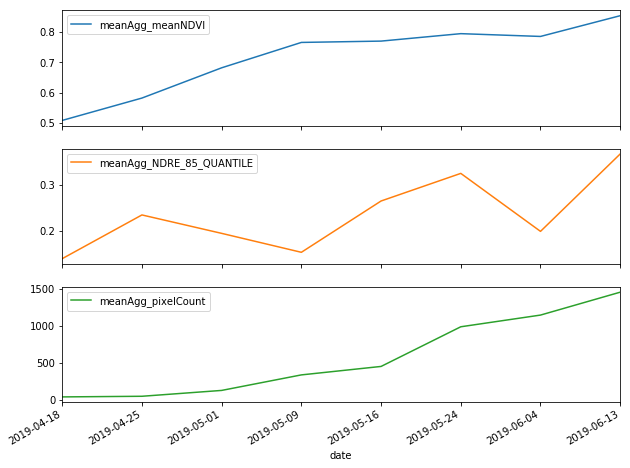

In [40]:
#plt.plot(broccoli_data_aggregates['date'],broccoli_data_aggregates[['meanNDVI']])
#plt.plot(meteomatics_aggregates['dateTo'],meteomatics_aggregates[['temperature', 'relativeHumidity','precipitation']])
#plt.show

meteomatics_aggregates.plot.line(x='dateTo', subplots=True, figsize=(10,8))
broccoli_data_aggregates.plot.line(x='date', subplots=True, figsize=(10,8))

In [41]:
meteomatics_data_reindexed = meteomatics_data.copy()
meteomatics_data_reindexed['timestamp'] = pd.to_datetime(meteomatics_data_reindexed['timestamp'])
meteomatics_data_reindexed.set_index("timestamp", drop=True, inplace=True)

tmp_weather = meteomatics_data_reindexed.resample('D').median()
tmp_weather = tmp_weather.add_prefix('median_')

tmp_weather_sum = meteomatics_data_reindexed.resample('D').sum()
tmp_weather['sum_precipitation'] = tmp_weather_sum['precipitation']
tmp_weather['sum_accumulatedEnergy'] = tmp_weather_sum['accumulatedEnergy']

print(tmp_weather.shape)
tmp_weather.describe()

(74, 19)


,median_temperature,median_relativeHumidity,median_absoluteHumidity,median_dewPoint,median_wind,median_cloudCover,median_precipitation,median_precipitationType,median_precipitationProbability,median_hail,median_evaporation,median_frostDepth,median_radiation,median_accumulatedEnergy,median_evapotranspiration,median_growingDegreeDays,median_leafWetness,sum_precipitation,sum_accumulatedEnergy
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.000000,74.0,74.000000,74.000000,74.000000,61.000000,74.000000,74.00000,7.400000e+01
mean,12.461487,72.965541,8.108784,7.505405,2.577027,62.422973,0.055068,0.060811,3.406081,0.0,-0.036486,0.0,169.577027,158169.162649,0.066419,110.598361,0.277027,3.84027,1.129290e+07
std,4.345637,14.345249,2.095402,3.928030,2.023225,41.955935,0.197743,0.233389,9.270250,0.0,0.024309,0.0,60.731496,216301.268731,0.046864,75.819792,0.431165,8.40825,9.355374e+06
min,4.350000,34.100000,4.800000,0.250000,0.850000,0.000000,0.000000,0.000000,1.000000,0.0,-0.095000,0.0,56.949998,561.300003,0.010000,0.000000,0.000000,0.00000,5.130390e+04
25%,8.750000,64.550002,6.500000,4.562500,1.362500,14.987500,0.000000,0.000000,1.000000,0.0,-0.060000,0.0,117.412503,4211.512512,0.031250,56.400002,0.000000,0.00000,2.229962e+06
50%,12.025000,75.250002,7.825000,7.225000,1.850000,88.475000,0.000000,0.000000,1.000000,0.0,-0.030000,0.0,178.125000,38531.048828,0.052500,85.500000,0.000000,0.42500,8.866472e+06
75%,15.387500,84.212502,9.775000,10.712500,2.887500,100.000000,0.008750,0.000000,1.000000,0.0,-0.016250,0.0,224.100002,224779.427734,0.088750,164.800003,0.500000,3.84750,2.002689e+07
max,21.650001,96.599998,12.700000,14.950000,10.700000,100.000000,1.105000,1.000000,52.900000,0.0,0.000000,0.0,316.199997,708771.593750,0.215000,283.200012,1.000000,49.36000,2.725631e+07


In [42]:
broccoli_data_reindexed = broccoli_data.copy()
broccoli_data_reindexed['timestamp'] = pd.to_datetime(broccoli_data_reindexed['timestamp'])
broccoli_data_reindexed.set_index("timestamp", drop=True, inplace=True)

tmp_broccoli = broccoli_data_reindexed.resample('D').median()
tmp_broccoli.drop(['id', 'lat', 'long'], axis=1, inplace=True)
tmp_broccoli = tmp_broccoli.add_prefix('median_')
#tmp_broccoli.dropna(axis=0, inplace=True)

print(tmp_broccoli.shape)
tmp_broccoli.head()

(57, 17)


,median_pixelCount,median_maxNDVI,median_minNDVI,median_meanNDVI,median_medianNDVI,median_NDVI_15_QUANTILE,median_NDVI_25_QUANTILE,median_NDVI_75_QUANTILE,median_NDVI_85_QUANTILE,median_maxNDRE,median_minNDRE,median_meanNDRE,median_medianNDRE,median_NDRE_15_QUANTILE,median_NDRE_25_QUANTILE,median_NDRE_75_QUANTILE,median_NDRE_85_QUANTILE
timestamp,,,,,,,,,,,,,,,,,
2019-04-18,37.0,0.599369,0.42495,0.508914,0.509552,0.450957,0.4683,0.5474,0.56345,0.187514,-0.005768,0.092574,0.092687,0.045465,0.062791,0.122229,0.137896
2019-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
weather_broccoli_daily = pd.concat([tmp_weather, tmp_broccoli], axis=1)
weather_broccoli_daily = weather_broccoli_daily.interpolate(method='linear')
weather_broccoli_daily = weather_broccoli_daily.drop(columns=['median_hail','median_frostDepth'])
print(weather_broccoli_daily.shape)
weather_broccoli_daily

(74, 34)


,median_temperature,median_relativeHumidity,median_absoluteHumidity,median_dewPoint,median_wind,median_cloudCover,median_precipitation,median_precipitationType,median_precipitationProbability,median_evaporation,...,median_NDVI_75_QUANTILE,median_NDVI_85_QUANTILE,median_maxNDRE,median_minNDRE,median_meanNDRE,median_medianNDRE,median_NDRE_15_QUANTILE,median_NDRE_25_QUANTILE,median_NDRE_75_QUANTILE,median_NDRE_85_QUANTILE
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-08,9.650000,75.300003,7.25,6.05,1.00,99.000000,0.000,0.0,1.000000,-0.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-09,8.750000,88.899998,7.90,7.35,0.90,100.000000,0.000,0.0,1.000000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-10,8.600000,96.599998,8.30,8.05,1.25,100.000000,0.000,0.0,1.000000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-11,8.450000,82.149998,7.05,5.80,2.55,100.000000,0.000,0.0,1.000000,-0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-12,6.300000,85.500000,6.40,4.15,1.15,100.000000,0.000,0.0,1.000000,-0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-13,5.950000,83.650002,5.80,2.85,1.75,97.450001,0.000,0.0,1.000000,-0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-14,4.900000,91.149998,5.90,2.90,1.90,100.000000,0.005,0.0,1.000000,-0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,7.850000,75.200001,6.15,3.55,0.85,5.050000,0.000,0.0,1.000000,-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16,10.500000,59.750000,6.50,4.80,3.50,74.549999,0.000,0.0,1.000000,-0.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


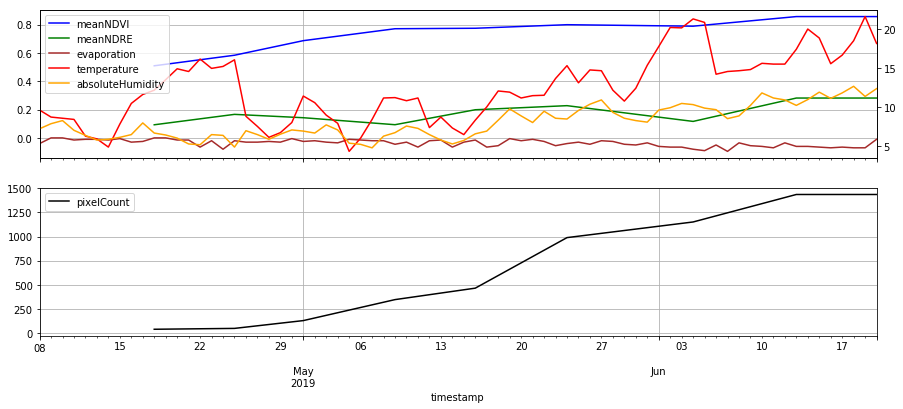

In [49]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.xlabel('meanNDVI vs. temperature')

ax1 = weather_broccoli_daily['median_meanNDVI'].plot(color='blue', grid=True, label='meanNDVI')
ax3 = weather_broccoli_daily['median_meanNDRE'].plot(color='green', grid=True, label='meanNDRE', sharey=ax1)

ax2 = weather_broccoli_daily['median_temperature'].plot(color='red', grid=True, secondary_y=True, label='temperature')
ax4 = weather_broccoli_daily['median_absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity',
                                                      sharey=ax2)
ax6 = weather_broccoli_daily['median_evaporation'].plot(color='brown', grid=True, label='evaporation',
                                                      sharey=ax2)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.subplot(2,1,2)
ax5 = weather_broccoli_daily['median_pixelCount'].plot(color='black', grid=True, secondary_y=False, label='pixelCount')

h5, l5 = ax5.get_legend_handles_labels()

plt.legend(h5, l5, loc=2)

plt.show()

In [50]:
#weather_broccoli_daily.plot(x='median_pixelCount', y=['median_meanNDRE','median_meanNDVI'])

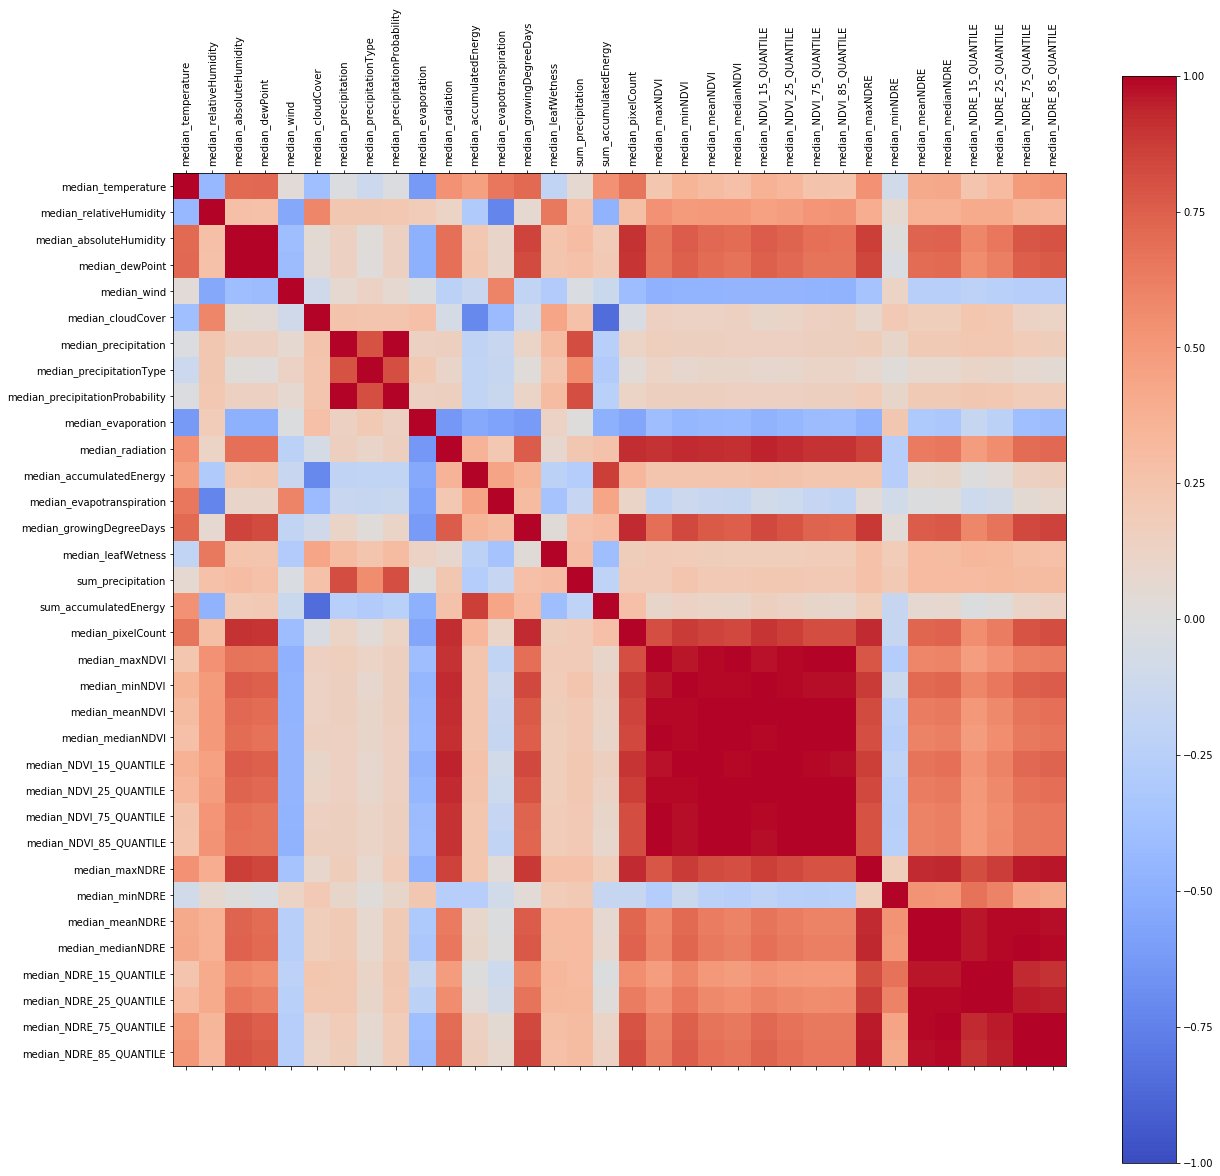

In [47]:
corr = weather_broccoli_daily.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(weather_broccoli_daily.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(weather_broccoli_daily.columns)
ax.set_yticklabels(weather_broccoli_daily.columns)
plt.show()

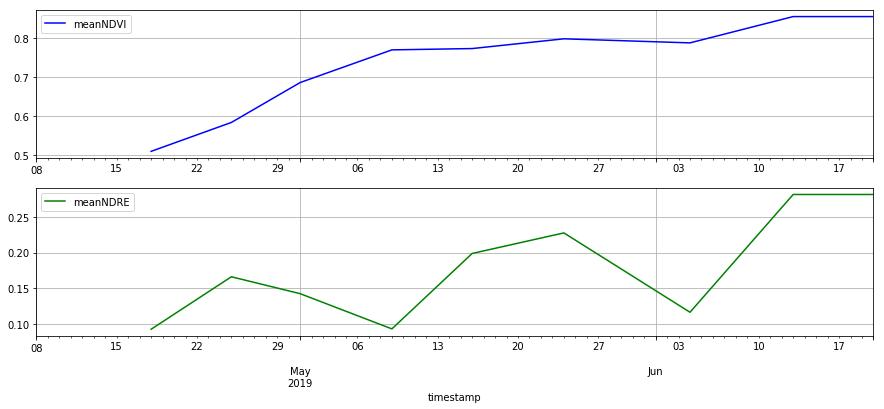

In [52]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.xlabel('meanNDVI, meanNDRE vs. temperature')

ax1 = weather_broccoli_daily['median_meanNDVI'].plot(color='blue', grid=True, label='meanNDVI')

#ax2 = weather_broccoli_daily['relativeHumidity'].plot(color='red', grid=True, secondary_y=True, label='relativeHumidity', sharey=ax2)
#ax4 = weather_broccoli_daily['absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity', sharey=ax2)
#ax5 = weather_broccoli_daily['dewPoint'].plot(color='green', grid=True, secondary_y=True, label='dewPoint', sharey=ax2)
#ax6 = weather_broccoli_daily['radiation'].plot(color='violet', grid=True, secondary_y=True, label='radiation', sharey=ax2)
#ax7 = weather_broccoli_daily['growingDegreeDays'].plot(color='black', grid=True, secondary_y=False, label='growingDegreeDays', sharey=ax2)

h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.subplot(2,1,2)
ax3 = weather_broccoli_daily['median_meanNDRE'].plot(color='green', grid=True, label='meanNDRE')
#ax8 = weather_broccoli_daily['relativeHumidity'].plot(color='red', grid=True, secondary_y=True, label='relativeHumidity')
#ax9 = weather_broccoli_daily['absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity', sharey=ax8)
#ax10 = weather_broccoli_daily['dewPoint'].plot(color='green', grid=True, secondary_y=True, label='dewPoint', sharey=ax8)
#ax11 = weather_broccoli_daily['radiation'].plot(color='violet', grid=True, secondary_y=True, label='radiation', sharey=ax8)
#ax12 = weather_broccoli_daily['growingDegreeDays'].plot(color='black', grid=True, secondary_y=True, label='growingDegreeDays',sharey=ax8)

h5, l5 = ax3.get_legend_handles_labels()
#h6, l6 = ax8.get_legend_handles_labels()

plt.legend(h5, l5, loc=2)

plt.show()